![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# **Proyecto 1 - MDS7202 Laboratorio de Programación Científica para Ciencia de Datos 📚**

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*

### Equipo:

- Michelle Avendaño
- Claudia Navarro


### Link de repositorio de GitHub: `https://github.com/ClaudiaRayen/MDS7202-Laboratorios/tree/Proyecto-1`

Fecha límite de entrega 📆: 06 de Noviembre de 2023.

----

## Reglas

- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

<div style="text-align: center;">
    <img src="https://worldskateamerica.org/wp-content/uploads/2023/07/SANTIAGO-2023-1-768x153.jpg" alt="Descripción de la imagen">
</div>

En un Chile azotado por un profundo caos político-económico y el resurgimiento de programas de televisión de dudosa calidad, todas las miradas y esperanzas son depositadas en el éxito de un único evento: Santiago 2023. La nación necesitaba desesperadamente un respiro, y los Juegos de Santiago 2023 prometían ser una luz al final del túnel.

El Presidente de la República -conocido en las calles como Bombín-, consciente de la importancia de este evento para la revitalización del país, decide convocar a usted y su equipo en calidad de expertos en análisis de datos y estadísticas. Con gran solemnidad, el presidente les encomienda una importante y peligrosa: liderar un proyecto que permitiera caracterizar de forma automática y eficiente los datos generados por estos magnos juegos. Para esto, el presidente le destaca que la solución debe considerar los siguientes puntos:
- Caracterización automática de los datos
- La solución debe ser compatible con cualquier dataset
- Se les facilita el dataset *olimpiadas.parquet*, el cual recopila data de diferentes juegos olímpicos realizados en los últimos años

In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import os
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler, OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re
import shutil
from sklearn.ensemble import IsolationForest
from tabulate import tabulate
import warnings
from scipy.spatial.distance import cdist
from sklearn.base import clone
from yellowbrick.cluster import KElbowVisualizer




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/proyecto1lab/olimpiadas.parquet')
data

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age-height-weight
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0*180.0?80.0
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0(170.0?60.0
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0(nan?nan
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0:nan?nan
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0(185.0?82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,29.0:179.0?89.0
271112,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,27.0:176.0?59.0
271113,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,27.0*176.0?59.0
271114,135571,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,30.0(185.0?96.0


## 1.1 Creación de `Profiler` Class (4.0 puntos)

Cree la clase `Profiler`. Como mínimo, esta debe tener las siguientes funcionalidades:

1. El método constructor, el cual debe recibir los datos a procesar en formato `Pandas DataFrame`. Además, este método debe generar una carpeta en su directorio de trabajo con el nombre `EDA_fecha`, donde `fecha` corresponda a la fecha de ejecución en formato `DD-MM-YYYY`.

2. El método `summarize`, el cual debe caracterizar las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Reportar el tipo de variable
    - Reportar el número y/o porcentaje de valores únicos de la variable
    - Reportar el número y/o porcentaje de valores nulos
    - Si la variables es numérica:
        - Reportar el número y/o porcentaje de valores cero, negativos y outliers
        - Reportar estadística descriptiva como el valor mínimo, máximo, promedio y los percentiles 25, 50, 75 y 100
   - Levantar una alerta en caso de encontrar alguna anomalía fuera de lo común (el criterio debe ser ajustable por el usuario)
   - Guardar sus resultados en el directorio `EDA_fecha/summary.txt`. El archivo debe separar de forma clara y ordenada los resultados de cada punto.

3. El método `plot_vars`, el cual debe graficar la distribución e interraciones de las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/plots`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Para las variables numéricas:
        - Genere un gráfico de distribución de densidad
        - Grafique la correlación entre las variables
    - Para las variables categóricas:
        - Genere un histograma de las top N categorías (N debe ser un parámetro ajustable)
        - Grafique el coeficiente V de Cramer entre las variables
    - Guardar cada gráfico generado en la carpeta `EDA_fecha/plots` en formato `.pdf` y bajo el naming `variable.pdf`, donde `variable` es el nombre de la variable de interés
    
4. El método `clean_data`, el cual debe limpiar los datos para que luego puedan ser procesados. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clean_data`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Drop de valores duplicados
    - Implementar como mínimo 2 técnicas para tratar los valores nulos, como:
        - Drop de valores nulos
        - Imputar valores nulos con alguna técnica de imputación
        - Funcionalidad para escoger entre una técnica y la otra.
    - Una de las columnas del dataframe presenta datos *no atómicos*. Separe dicha columna en las columnas que la compongan.
        - Hint: ¿Qué caracteres permiten separar una columna de otra?
        - Para las pruebas con el dataset nuevo, puede esperar que exista al menos una columna con este tipo de problema. Asuma que los separadores serán los mismos, aunque el número de columnas a separar puede ser distinto.
    - Deberían usar `FunctionTransformer`.
    - Guardar los datos procesados en formato `.csv` en el path `EDA_fecha/clean_data/data.csv`

5. El método `scale`, el cual debe preparar adecuadamente los datos para luego ser consumidos por algún tipo de algoritmo. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/scale`
    - Procesar de forma adecuada los datos numéricos y categóricos:
        - Su método debe recibir las técnicas de escalamiento como argumento de entrada (utilizar solo técnicas compatibles con el framework de `sklearn`)
        - Para los atributos numéricos, se transforme los datos con un escalador logarítmico y un `MinMaxScaler`
        - Asuma que no existen datos ordinales en su dataset
    - Guardar todo este procesamiento en un `ColumnTransformer`.
    - Guardar los datos limpios y transformados en formato `.csv` en el path `EDA_fecha/process/scaled_features.csv`

6. El método `make_clusters`, el cual debe generar clusters de los datos usando algún algoritmo de clusterización. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clusters`
    - Generar un estudio del codo donde señale la cantidad de clusters optimos para el desarrollo.
    - Su método debe recibir el algoritmo de clustering como argumento de entrada (utilizar solo algoritmos compatibles con el framework de `sklearn`).
    - No olvide pre procesar adecuadamente los datos antes de implementar la técnica de clustering.
    - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5.
    - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
    - Una vez generado los clusters, proyecte los datos a 2 dimensiones usando su técnica de reducción de dimensionalidad favorita y grafique los resultados coloreando por cluster.
    - Guardar los datos con su respectivo cluster en formato `.csv` en el path `EDA_fecha/clusters/data_clusters.csv`. Guarde también los gráficos generados en el mismo path.

7. El método `detect_anomalies`, el cual debe detectar anomalías en los datos. Como mínimo, se espera que su método pueda:

    - Crear la carpeta `EDA_fecha/anomalies`
    - Implementar alguna técnica de detección de anomalías.
    - Al igual que el punto anterior, su método debe considerar los siguientes puntos:
        - No olvide pre procesar de forma adecuada los datos antes de implementar la técnica de detección de anomalía.
        - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5.
        - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
        - Su método debe recibir el algoritmo como argumento de entrada
        - Una vez generado las etiquetas, proyecte los datos a 2 dimensiones y grafique los resultados coloreando por las etiquetas predichas por el detector de anomalías
    - Guardar los datos con su respectiva etiqueta en formato `.csv` en el path `EDA_fecha/anomalies/data_anomalies.csv`. Guarde también los gráficos generados en el mismo path.

8. El método `profile`, el cual debe ejecutar todos los métodos anteriores.

9. Crear el método `clearGarbage` para eliminar las carpetas/archivos creados/as por la clase `Profiler`.

Algunas consideraciones generales:
- Su clase será testeada con datos tabulares diferentes a los provistos. No desarrollen código *hardcodeado*: su clase debe ser capaz de funcionar para **cualquier** dataset.
- Aplique todo su conocimiento sobre buenas prácticas de programación: se evaluará que su código sea limpio y ordenado.
- Recuerden documentar cada una de las funcionalidades que implementen.
- Recuerden adjuntar sus `requirements.txt` junto a su entrega de proyecto. **El código que no se pueda ejecutar por imcompatibilidades de librerías no será corregido.**

In [ ]:
class Profiler():
###CONSTRUCTOR###
    def __init__(self, data: pd.DataFrame):
        """
        Inicializa la clase Profiler con el DataFrame proporcionado y crea una carpeta
        para almacenar los resultados del EDA con la fecha actual como referencia.

        Args:
            data (pd.DataFrame): El DataFrame a analizar.
        """
        self.data = data


        # Crear carpeta con el formato EDA_fecha
        self.folder_name = "EDA_" + datetime.datetime.now().strftime('%d-%m-%Y')
        if not os.path.exists(self.folder_name):
            os.makedirs(self.folder_name)

###SUMMARIZE###
    def summarize(self, cols=None, factor_outlier=1.5):
        """
        Resumen de estadísticas descriptivas para las columnas del DataFrame.
        Puede calcular y alertar sobre la presencia de valores atípicos usando el método del rango intercuartílico (IQR).

        Args:
            cols (list, optional): Columnas específicas a resumir. Si es None, resume todas las columnas.
            factor_outlier (float): Factor para identificar valores atípicos basado en el IQR.
        """
        if cols:
            df = self.data[cols]
        else:
            df = self.data

        summary = {}
        for col in df.columns:
            summary[col] = {}
            summary[col]['tipo'] = df[col].dtype
            summary[col]['valores_unicos'] = df[col].nunique()
            summary[col]['valores_nulos'] = df[col].isna().sum()


            if df[col].dtype in ['int64', 'float64']:
                summary[col]['valores_cero'] = (df[col] == 0).sum()
                summary[col]['valores_negativos'] = (df[col] < 0).sum()

                # Outliers
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                outliers = df[(df[col] < (Q1 - factor_outlier * IQR)) | (df[col] > (Q3 + factor_outlier * IQR))] #aqui influye el valor del factor
                if not outliers.empty:
                    print(f"¡Alerta! Se encontraron {len(outliers)} outliers en la columna '{col}'")
                summary[col]['outliers'] = len(outliers)

                # Estadísticas descriptivas
                summary[col]['min'] = df[col].min()
                summary[col]['25%'] = df[col].quantile(0.25)
                summary[col]['50%'] = df[col].quantile(0.50)
                summary[col]['75%'] = df[col].quantile(0.75)
                summary[col]['max'] = df[col].max()
        # Verificar duplicados
        duplicates_count = len(self.data) - len(self.data.drop_duplicates())
        if duplicates_count > 0:
            print(f"¡ALERTA! Se encontraron {duplicates_count} valores duplicados en el conjunto de datos.")

        #Resumen
        with open(f'{self.folder_name}/summary.txt', 'w') as f:
            for k, v in summary.items():
                f.write(f"{k}:\n")
                for key, val in v.items():
                    f.write(f"  {key}: {val}\n")
                f.write("\n")
###PLOT_VARS###
    def plot_vars(self, cols=None, top_n=10):
        """
        Método que genera y guarda visualizaciones para las distribuciones de las variables
        y sus correlaciones, tanto para variables numéricas como categóricas.

        Para las variables numéricas, crea gráficos de densidad de distribución y un mapa de calor
        de correlación. Para las variables categóricas, genera histogramas de las principales
        categorías y calcula el coeficiente V de Cramer entre pares de variables categóricas.

        Args:
            cols (list, optional): Lista de columnas para las que se generarán las visualizaciones.
                Si se omite, se utilizarán todas las columnas del DataFrame.
            top_n (int, optional): Número de principales categorías a visualizar en los histogramas
                para variables categóricas. Por defecto es 10.

        Notas:
            - Los gráficos generados se guardarán en el subdirectorio 'plots' dentro de la carpeta
              correspondiente al EDA con la fecha actual.
            - Los archivos de gráficos se guardan en formato PDF.
        """
        # Crear carpeta si no existe
        plots_folder = f'{self.folder_name}/plots'
        os.makedirs(plots_folder, exist_ok=True)

        if cols:
            df = self.data[cols]
        else:
            df = self.data

        # Graficar distribución y correlación para variables numéricas
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_cols:
            plt.figure(figsize=(10,6))
            sns.kdeplot(df[col], fill=True)
            plt.title(f'Densidad de distribución de {col}')
            plt.savefig(f'{plots_folder}/{col}.pdf')
            plt.close()

        if len(numeric_cols) > 1:
            plt.figure(figsize=(10,6))
            sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
            plt.title('Correlación de las variables numéricas')
            plt.savefig(f'{plots_folder}/correlacion.pdf')
            plt.close()

      ###Categóricas###

        #Top N
        cat_cols = df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            plt.figure(figsize=(10,6))
            df[col].value_counts().head(top_n).plot(kind='bar')
            plt.title(f'Top {top_n} categorías de {col}')
            plt.savefig(f'{plots_folder}/{col}_histograma.pdf')
            plt.close()

        # Sección para calcular la matriz de correlación de Cramer's V

        # Crear una matriz de correlación para las variables categóricas
        corr_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)
        for col1 in cat_cols:
            for col2 in cat_cols:
                if col1 != col2:
                   # Verificación para saltar combinaciones con alta cardinalidad
                    if df[col1].nunique() * df[col2].nunique() > 990000000:
                        corr_matrix.loc[col1, col2] = np.nan
                        continue

                    confusion_matrix = pd.crosstab(df[col1], df[col2])
                    chi2 = chi2_contingency(confusion_matrix)[0]
                    n = confusion_matrix.sum().sum()
                    phi2 = chi2 / n
                    r, k = confusion_matrix.shape
                    # Agregar comprobación para dimensiones negativas o cero
                    if min(r-1, k-1) == 0:
                        corr_matrix.loc[col1, col2] = 0
                    else:
                        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
                        rcorr = r - ((r - 1) ** 2) / (n - 1)
                        kcorr = k - ((k - 1) ** 2) / (n - 1)
                        cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
                        corr_matrix.loc[col1, col2] = cramers_v

        # Graficar la matriz de correlación
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', center=0)
        plt.title('Coeficiente de Cramer\'s V entre variables categóricas')
        plt.savefig(f'{plots_folder}/cramer_v_matrix.pdf')
        plt.close()

###CLEAN DATA###

    def _split_non_atomic(self, data, separators=[':', "(", "?", '*']):
            """
            Función para dividir las columnas que contienen múltiples valores en una sola celda.

            Args:
                data (pd.DataFrame): El DataFrame con posibles columnas no atómicas.
                separators (list): Lista de separadores utilizados para dividir las columnas.

            Returns:
                pd.DataFrame: DataFrame con las columnas divididas y valores convertidos a numéricos donde sea posible.
            """

            # Escapar los separadores para regex
            separators_regex = '|'.join(map(re.escape, separators))

            # Identificar columnas no numéricas con separadores
            non_atomic_columns = [
                column for column in data.columns if not pd.api.types.is_numeric_dtype(data[column]) and
                data[column].str.contains(separators_regex).any() and not data[column].str.contains("\)").any()
            ]

            # Procesar cada columna no atómica
            for column in non_atomic_columns:
                # Dividir la columna en múltiples columnas usando los separadores
                split_data = data[column].str.split(separators_regex, expand=True)

                # Asignar nuevos nombres a las columnas divididas
                split_columns = [f'{column}_{i}' for i in range(split_data.shape[1])]
                split_data.columns = split_columns

                # Convertir a numérico si es posible
                for split_column in split_columns:
                    split_data[split_column] = pd.to_numeric(split_data[split_column], errors='coerce')

                # Eliminar la columna original y unir las nuevas columnas al DataFrame
                data = data.drop(column, axis=1).join(split_data)

            # Reemplazar cadenas 'nan' con np.nan para uniformidad
            data.replace('nan', np.nan, inplace=True)
            return data


    def _cleaning_operations(self, data, method, nan_threshold=0.5, cols_to_clean=None):
        """
          Función para realizar operaciones de limpieza en el DataFrame, como eliminar columnas con
          un alto porcentaje de valores NaN o imputar valores faltantes.

          Args:
              data (pd.DataFrame): DataFrame a limpiar.
              method (str): Método de limpieza ('drop' o 'impute').
              nan_threshold (float): Umbral para la proporción de NaNs permitidos antes de eliminar una columna.
              cols_to_clean (list): Columnas específicas a limpiar. Si es None, limpia todo el DataFrame.

          Returns:
              pd.DataFrame: DataFrame limpio.
        """
        #Si es que hay columnas en específico que limpiar
        if cols_to_clean:
            df_to_clean = data[cols_to_clean].drop_duplicates()
        else:
            df_to_clean = data.drop_duplicates()
        #Eliminar columnas con muchos NAN
        threshold = len(df_to_clean) * nan_threshold
        df_to_clean = df_to_clean.dropna(thresh=threshold, axis=1)

        #Métodos para los NAN, de defecto es drop
        if method == "drop":
            df_to_clean.dropna(inplace=True)
        elif method == "impute":
            for col in df_to_clean.columns:
                if pd.api.types.is_numeric_dtype(df_to_clean[col]):
                    df_to_clean[col].fillna(df_to_clean[col].median(), inplace=True)
                else:
                    df_to_clean[col].fillna(df_to_clean[col].mode()[0], inplace=True) #Para las categóricas
        # Eliminar duplicados finales
        df_to_clean = df_to_clean.drop_duplicates()

        if cols_to_clean:
            # Reemplazar las columnas originales con las limpiadas en el DataFrame completo
            data.update(df_to_clean)
            return data
        else:
            return df_to_clean

    def clean_data(self, cols_to_clean=None, method="drop", nan_threshold=0.5):

        """
        Método  para limpiar el DataFrame. Divide primero las columnas no atómicas y luego realiza
        las operaciones de limpieza especificadas.

        Args:
            cols_to_clean (list): Columnas específicas a limpiar. Si es None, limpia todo el DataFrame.
            method (str): Método de limpieza a utilizar ('drop' o 'impute').
            nan_threshold (float): Umbral para la proporción de NaNs permitidos antes de eliminar una columna.

        Returns:
            pd.DataFrame: DataFrame limpio.
        """
        clean_data_folder = f'{self.folder_name}/clean_data'
        os.makedirs(clean_data_folder, exist_ok=True)

        # Aplicar _split_non_atomic a todo el DataFrame
        split_transformer = FunctionTransformer(self._split_non_atomic)
        df_split = split_transformer.transform(self.data.copy())

        # Aplicar _cleaning_operations solo a las columnas especificadas
        clean_transformer = FunctionTransformer(
            self._cleaning_operations,
            kw_args={'method': method, 'nan_threshold': nan_threshold, 'cols_to_clean': cols_to_clean}
        )
        df_clean = clean_transformer.transform(df_split)

        df_clean.to_csv(f'{clean_data_folder}/data.csv', index=False)
        self.cleaned_data = df_clean
        return df_clean

    def scale(self, numeric_scaler='log_min_max', categorical_encoder='OneHotEncoder', ignore_cols=None):
        """
        Escala y transforma los datos del DataFrame limpio. A las columnas numéricas se aplica un escalado logarítmico a través de StandardScaler
        y luego un escalado Min-Max a través de MinMaxScaler. Además, se aplica la codificación One-Hot a las columnas categóricas.

        Los datos escalados y codificados se almacenan en un nuevo DataFrame y se guardan en un archivo CSV.

        Args:
            numeric_scaler (str): Método de escalado para variables numéricas ('log_min_max' o 'standard_min_max').
            categorical_encoder (str): Método de codificación para variables categóricas ('OneHotEncoder').
            ignore_cols (list): Lista de columnas a ignorar durante el escalamiento y codificación, como los ID y los nombres de individuos.

        Returns:
            pd.DataFrame: DataFrame con los datos escalados y codificados.
        """
        # Crear carpeta para los datos procesados
        scale_folder = f'{self.folder_name}/scale'
        os.makedirs(scale_folder, exist_ok=True)

        # Utilizar el DataFrame limpio guardado en self.cleaned_data
        data_to_scale = self.cleaned_data.copy()

        # Seleccionar las columnas numéricas y categóricas
        numeric_cols = data_to_scale.select_dtypes(include=['float64', 'int64']).columns
        categorical_cols = data_to_scale.select_dtypes(include=['object', 'category']).columns

        # Excluir las columnas especificadas de la transformación
        if ignore_cols:
            numeric_cols = [col for col in numeric_cols if col not in ignore_cols]
            categorical_cols = [col for col in categorical_cols if col not in ignore_cols]

        # Imprimir estadísticas antes del escalado
        print("Estadísticas antes del escalado:")
        stats_before_scaling = data_to_scale[numeric_cols].describe()
        print(tabulate(stats_before_scaling, headers='keys', tablefmt='fancy_grid'))

        # Escalar logarítmicamente con StandardScaler y luego MinMaxScaler
        numeric_transformer = Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('min_max', MinMaxScaler(copy=False))
        ])

        # OneHotEncoder para las columnas categóricas
        categorical_transformer = OneHotEncoder(drop='first', sparse=False)

        # Crear un ColumnTransformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('numeric', numeric_transformer, numeric_cols),
                ('categorical', categorical_transformer, categorical_cols)
            ])

        # Aplicar ColumnTransformer a los datos a escalar
        scale_data = preprocessor.fit_transform(data_to_scale)

        # Nuevo df con los datos escalados y codificados
        processed_cols = list(numeric_cols) + list(preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_cols))
        scale_df = pd.DataFrame(scale_data, columns=processed_cols)

        # Agregar las columnas ignoradas nuevamente al df escalado
        if ignore_cols:
            for col in ignore_cols:
                if col in self.cleaned_data:
                    scale_df[col] = self.cleaned_data[col]

        # Imprimir estadísticas después del escalado
        print("Estadísticas después del escalado:")
        stats_after_scaling = scale_df[numeric_cols].describe()
        print(tabulate(stats_after_scaling, headers='keys', tablefmt='fancy_grid'))

        # Guardar los datos en un archivo CSV
        scale_df.to_csv(f'{scale_folder}/scaled_features.csv', index=False)
        self.scale_data = scale_df

        # Imprimir el tamaño del DataFrame escalado
        print("Tamaño del DataFrame escalado:")
        table = [["Filas", scale_df.shape[0]], ["Columnas", scale_df.shape[1]]]
        print(tabulate(table, headers=["", ""], tablefmt="fancy_grid"))

        return scale_df


###MAKE CLUSTERS###
    def make_clusters(self, algorithm='KMeans', ignore_cols=None, save_plots=True):
        clusters_folder = f'{self.folder_name}/clusters'
        os.makedirs(clusters_folder, exist_ok=True)

        #procesar los datos con los metodos clean_data() y scale() en caso que no esten limpios y escalados
        if not hasattr(self, 'cleaned_data'):
            print("Datos no limpios, ejecutando clean_data...")
            self.clean_data()

        if not hasattr(self, 'scale_data'):
            print("Datos no escalados, ejecutando scale...")
            self.scale()

        data_to_cluster = self.scale_data.copy()
        original_data_before_cleaning = self.data.copy()

        if ignore_cols:
            data_to_cluster = data_to_cluster.drop(ignore_cols, axis=1)

        if algorithm == 'KMeans':
            model = KMeans(random_state=10)
            visualizer = KElbowVisualizer(model, k=(2, 11))

            pipeline = Pipeline([
                ('kmeans', model)
            ])

            visualizer.fit(data_to_cluster.sample(frac=0.1, random_state=42))
            visualizer.show()
            if save_plots:
                visualizer.show(outpath=f'{clusters_folder}/elbow_plot.png')

            optimal_n_clusters = visualizer.elbow_value_

            kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
            cluster_labels = kmeans.fit_predict(data_to_cluster)

            original_data_limpio = pd.read_csv(f'{self.folder_name}/clean_data/data.csv')
            original_data_limpio['Cluster'] = cluster_labels

            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(data_to_cluster)

            cluster_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
            cluster_df['Cluster'] = cluster_labels

            cluster_df = cluster_df.reindex(original_data_before_cleaning.index)
            original_data = original_data_before_cleaning.join(cluster_df)
            original_data['Cluster'] = original_data['Cluster'].fillna(-1)

            cluster_df.to_csv(f'{clusters_folder}/data_clusters_pcs.csv', index=False)
            original_data_limpio.to_csv(f'{clusters_folder}/data_clusters_limpio.csv', index=False)
            original_data.to_csv(f'{clusters_folder}/data_clusters.csv', index=False)

            plt.figure(figsize=(10, 8))
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
            scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='rainbow', s=5, alpha=1)
            plt.title('Proyección de cluster a 2 Dimensiones')
            plt.xlabel('PC1')
            plt.ylabel('PC2')

            if save_plots:
                plt.savefig(f'{clusters_folder}/cluster_plot.png')

            cluster_stats = []
            for cluster_id in range(optimal_n_clusters):
                cluster_data = original_data_limpio[original_data_limpio['Cluster'] == cluster_id]
                cluster_stats = cluster_data.describe()
                cluster_stats.to_csv(f'{clusters_folder}/cluster_{cluster_id}_estadisticas.csv')
                print(f"Estadísticas descriptivas para el Cluster {cluster_id}:")
                print(tabulate(cluster_stats, headers='keys', tablefmt='fancy_grid'))

            cluster_counts = original_data_limpio['Cluster'].value_counts().reset_index()
            cluster_counts.columns = ['Cluster', 'Count']
            print("Conteo de registros en cada cluster:")
            print(tabulate(cluster_counts, headers='keys', tablefmt='fancy_grid'))

            return original_data_limpio

##DETECT ANOMALIES###

    def detect_anomalies(self, algorithm='IsolationForest', exclude_cols=None, save_plots=True):
        """
        Detecta anomalías en los datos utilizando una técnica de detección de anomalías y proyecta los datos
        a 2 dimensiones. Luego, grafica los resultados coloreando por las etiquetas de anomalía predichas.

        Args:
            algorithm (str): Algoritmo de detección de anomalías, p. ej., 'IsolationForest'.
            exclude_cols (list): Lista de columnas a excluir de la detección de anomalías.
            save_plots (bool): Si se deben guardar los gráficos generados en la carpeta de anomalías.

        Returns:
            pd.DataFrame: DataFrame con los datos originales y etiquetas de anomalía.
        """
        # Crear la carpeta de anomalías
        anomalies_folder = f'{self.folder_name}/anomalies'
        os.makedirs(anomalies_folder, exist_ok=True)

        #procesar los datos con los metodos clean_data() y scale() en caso que no esten limpios y escalados
        if self.cleaned_data is None:
            self.clean_data()

        if self.scale_data is None:
            self.scale()

        # Utilizar los datos escalados almacenados en self.scale_data
        processed_data = self.scale_data.copy()

        # Guardar una copia de los datos originales antes de la limpieza
        original_data_before_cleaning = self.data.copy()

        # Excluir las columnas especificadas de la detección de anomalías
        if exclude_cols:
            processed_data = processed_data.drop(exclude_cols, axis=1)

        # Crear un Pipeline para el proceso de detección de anomalías
        if algorithm == 'IsolationForest':
            anomaly_pipeline = Pipeline([
                ('anomaly_detection', IsolationForest(contamination=0.05, random_state=10)),
            ])
        else:
            anomaly_pipeline = None

        if anomaly_pipeline is not None:
            # Aplicar el algoritmo de detección de anomalías y obtener las etiquetas
            anomaly_labels = anomaly_pipeline.fit_predict(processed_data)

            # Asegurarse de que `original_data_before_cleaning` y `self.scale_data` tengan la misma longitud
            original_data_before_cleaning = original_data_before_cleaning.iloc[:len(anomaly_labels)]

            # Agregar las etiquetas de anomalía a los datos originales antes de ser limpiados
            original_data_before_cleaning['Anomaly'] = anomaly_labels

            # Realizar reducción de dimensionalidad usando PCA
            pca = PCA(n_components=2)
            reduced_data = pca.fit_transform(processed_data)

            # Crear un DataFrame con los datos limpios y sus etiquetas de anomalía
            anomaly_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
            anomaly_df['Anomaly'] = anomaly_labels
            # Calcular e imprimir estadististicas de los datos anomalos y no anomalos
            numerical_variables = processed_data.select_dtypes(include=['number'])
            anomalies_stats = processed_data[anomaly_labels == -1][numerical_variables.columns].describe()
            normal_stats = processed_data[anomaly_labels == 1][numerical_variables.columns].describe()
            display_columns = numerical_variables.columns[:10]
            anomalies_stats = anomalies_stats[display_columns]
            normal_stats = normal_stats[display_columns]
            anomalies_stats = anomalies_stats.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
            normal_stats = normal_stats.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
            anomalies_stats_table = tabulate(anomalies_stats, headers='keys', tablefmt='fancy_grid')
            normal_stats_table = tabulate(normal_stats, headers='keys', tablefmt='fancy_grid')
            print("Estadisticas para anomalias (First 10 Columns, 3 Decimals):")
            print(anomalies_stats_table)
            print("Estadisticas para datos no anomalos (First 10 Columns, 3 Decimals):")
            print(normal_stats_table)


            # Gráfico
            plt.figure(figsize=(10, 8))
            colors = {1: 'blue', -1: 'red'}
            scatter_colors = [colors[label] for label in anomaly_labels]
            point_size = 5
            scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=scatter_colors, s=point_size)
            plt.title('Proyección de Datos a 2 Dimensiones (Anomalías en Rojo)')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            legend_labels = {'Anomalía': 'red', 'Datos Normales': 'blue'}
            handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10,
                          markerfacecolor=color) for label, color in legend_labels.items()]
            plt.legend(handles=handles)

            # Guardar los datos con etiquetas de anomalía en formato.csv
            anomaly_data = self.scale_data.copy()
            anomaly_data['Anomaly'] = anomaly_labels
            # Guardar los datos originales antes de ser limpiados con la etiqueta de anomalía
            original_data_before_cleaning.to_csv(f'{anomalies_folder}/data_anomalies.csv', index=False)
            # Guardar los datos de componentes principales y etiqueta de anomalía en formato.csv
            anomaly_df.to_csv(f'{anomalies_folder}/data_anomalies_pcs.csv', index=False)

            # Imprimir el conteo de anomalías y datos normales
            anomaly_count = len(anomaly_labels[anomaly_labels == -1])
            normal_count = len(anomaly_labels[anomaly_labels == 1])
            table_data = [
                    {"Tipo": "Anomalías", "Conteo": anomaly_count},
                    {"Tipo": "Datos Normales", "Conteo": normal_count}
                ]
            print("Conteo de Anomalías y Datos Normales:")
            print(tabulate(table_data, headers="keys", tablefmt="fancy_grid"))

            return anomaly_df
        else:
            # Si se elige un algoritmo incompatible
            return None

###PROFILE###
    def profile(self):
            """
            Ejecuta todos los métodos de la clase.
            """
            print("Iniciando el perfilado de los datos.")

            # 1. Caracterizar las variables
            print("Caracterizando variables...")
            self.summarize()

            # 2. Graficar la distribución e interacciones de las variables
            print("Graficando variables...")
            self.plot_vars()

            # 3. Limpiar los datos
            print("Limpiando datos...")
            self.clean_data()

            # 4. Preparar los datos para algoritmos de aprendizaje automático
            print("Escalando características...")
            self.scale()

            # 5. Crear clusters
            print("Generando clusters...")
            self.make_clusters()

            # 6. Detectar anomalías
            print("Detectando anomalías...")
            self.detect_anomalies()

            print("Listo ✨")

###CLEAR GARBAGE###
    def clearGarbage(self):
            """
            Elimina la carpeta creada con todas las subcarpetas
            """
            try:
                shutil.rmtree(self.folder_name)
                print(f"La carpeta {self.folder_name} ha sido eliminada.")
            except OSError as e:
                print(f"Error: {e.strerror}")


## 1.2 Caracterizar datos de Olimpiadas (2.0 puntos)

A partir de la clase que hemos desarrollado previamente, procederemos a realizar un análisis exhaustivo de los datos proporcionados en el enunciado. Este análisis se presentará en forma de un informe contenido en el mismo Jupyter Notebook y abordará los siguientes puntos:

1. Introducción
    - Se proporcionará una breve descripción del problema que estamos abordando y se explicará la metodología que se seguirá.

Elaborar una breve introducción con todo lo necesario para entender qué realizarán durante su proyecto. La idea es que describan de manera formal el proyecto con sus propias palabras y logren describir algunos aspectos básicos tanto del dataset como del análisis a realizar sobre los datos.

Por lo anterior, en esta sección ustedes deberán ser capaces de:

- Describir la tarea asociada al dataset.
- Describir brevemente los datos de entrada que les provee el problema.
- Plantear hipótesis de cómo podrían abordar el problema.

2. Análisis del EDA (Análisis Exploratorio de Datos)
    - Se discutirán las observaciones y conclusiones obtenidas acerca de los datos proporcionados. A lo largo de su respuesta, debe responder preguntas como:
        - ¿Como se comportan las variables numéricas? ¿y las categóricas?
        - ¿Existen valores nulos en el dataset? ¿En qué columnas? ¿Cuantos?
        - ¿Cuáles son las categorías y frecuencias de las variables categóricas?
        - ¿Existen datos duplicados en el conjunto?
        - ¿Existen relaciones o patrones visuales entre las variables?
        - ¿Existen anomalías notables o preocupantes en los datos?
3. Creación de Clusters y Anomalías
    - Se justificará la elección de los algoritmos a utilizar y sus hiperparámetros. En el caso de clustering, justifique además el número de clusters.
    
4. Análisis de Resultados
    - Se examinarán los resultados obtenidos a partir de los clústers y anomalías generadas. ¿Se logra una separación efectiva de los datos? Entregue una interpretación de lo que representa cada clúster y anomalía.
5. Conclusión
    - Se resumirán las principales conclusiones del análisis y se destacarán las implicaciones prácticas de los resultados obtenidos.

#**INTRODUCCIÓN**

Chile se encuentra en un momento crítico de su historia, caracterizado por la agitación política y desafíos económicos. En este contexto, los Juegos de Santiago 2023 representan una oportunidad crucial para la nación. Estos juegos no solo prometen destacar a nivel internacional, sino también ofrecer un respiro bienvenido para la sociedad chilena.


El presidente de la República, conocido como "Bombín" por la población, ha convocado a un equipo de expertos en análisis de datos y estadísticas para liderar un proyecto esencial. La hipótesis fundamental es que una caracterización detallada de los datos generados por los juegos permitirá tomar decisiones informadas, identificar patrones clave y abordar desafíos anticipadamente.

Sin embargo, un desafío evidente en esta tarea es la presencia de valores nulos (NaN) en los datos, lo que dificulta su análisis y la obtención de información útil. Además, la estructura de la tabla, no siempre atómica, con datos en un formato que requiere procesamiento, plantea un reto adicional para el análisis.


Los datos en cuestión, como se muestra en la siguiente tabla, incluyen información variada, desde detalles sobre los atletas y sus logros hasta datos demográficos como edad, altura y peso.



In [ ]:
data

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age-height-weight
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0*180.0?80.0
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0(170.0?60.0
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0(nan?nan
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0:nan?nan
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0(185.0?82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,29.0:179.0?89.0
271112,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,27.0:176.0?59.0
271113,135570,Piotr ya,M,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,27.0*176.0?59.0
271114,135571,Tomasz Ireneusz ya,M,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,30.0(185.0?96.0


A lo largo de este proyecto, se creará una clase Profiler versátil para analizar los datos, incluyendo la caracterización de variables, generación de gráficos, limpieza de datos y detección de anomalías. Se realizará un análisis exhaustivo de los datos de las Olimpiadas proporcionados en el archivo "olimpiadas.parquet", abordando aspectos como valores nulos, duplicados y patrones visuales. Además, se explorarán clusters y anomalías, evaluando su relevancia en el contexto de los Juegos de Santiago 2023.


El objetivo principal de este análisis es establecer una base sólida que respalde la toma de decisiones y contribuya al éxito de un evento de vital importancia para la revitalización de Chile, los Juegos de Santiago 2023. A través de este enfoque analítico, se desprenden implicaciones prácticas significativas. Por ejemplo, la segmentación de atletas en clusters podría allanar el camino para decisiones estratégicas tales como la asignación de becas o la provisión de material especializado a los miembros de estos grupos específicos.

Asimismo, este análisis puede ser fundamental para optimizar la planificación de los eventos deportivos, aprovechando la comprensión profunda de las distribuciones de edad y características físicas de los atletas. Además, ofrece la oportunidad de mejorar las estrategias de marketing y patrocinio, permitiendo que las organizaciones deportivas y las empresas asociadas dirijan sus recursos de manera más eficaz. Estos aspectos son fundamentales para el desarrollo y el éxito integral de los Juegos de Santiago 2023, consolidando su importancia en la revitalización de Chile.

#**Análisis Exploratorio de Datos**

Para esta sección, se analizará la data original (sin hacer una muestra),es decir, antes de realizar la limpieza de datos.



In [ ]:
#Se crea una instancia y se realiza el método profile  con las entradas default
profiler = Profiler(data)
profiler.summarize()
profiler.plot_vars()

¡Alerta! Se encontraron 380 outliers en la columna 'Year'
¡ALERTA! Se encontraron 668 valores duplicados en el conjunto de datos.


Tras analizar el resumen de los datos, se destacan varios aspectos clave en el conjunto de datos. Este conjunto tiene 668 valores duplicados y consta de 13 variables, siendo únicamente dos de ellas de naturaleza numérica. La variable "YEAR" presenta 380 valores atípicos según el método IQR, lo que sugiere posibles discrepancias en los años registrados. Sin embargo, dado que "YEAR" representa el año en que se llevaron a cabo los eventos deportivos, es comprensible que haya outliers debido al amplio rango temporal cubierto por los datos.

Por otro lado, la variable "Medal" es la única que contiene valores nulos, totalizando 231,333 valores faltantes. Dado que la cantidad de filas en la base de datos es de 271,116, esta cantidad de valores nulos es considerable y requerirá atención.

Finalmente, se observa que la variable denominada "age-height-weight," a pesar de su nombre, se clasifica como categórica, lo que resulta inusual. Es necesario investigar más a fondo los datos en esta columna para entender su contenido y su relación con la edad, altura y peso.

En lo que respecta a las distribuciones de las variables numéricas, se destacan varios hallazgos significativos. La variable "YEAR" abarca un amplio rango de años, y se observa que alrededor de la década de 1940, hubo una disminución en la participación en los juegos, mientras que a partir de la década de 2000, la participación ha experimentado un notable aumento.

En cuanto al identificador "ID," se advierte que la mayoría de los jugadores han participado en múltiples ocasiones, indicando una reiterada presencia de atletas en los juegos. Es relevante señalar que en el gráfico de correlación se muestra una baja correlación entre estas variables, lo cual es coherente, ya que "ID" funciona exclusivamente como un identificador único.

Prosiguiendo con los histogramas de las variables categóricas, se destaca que el equipo con mayor presencia en los juegos es Estados Unidos, y, de manera consistente, este país es el que más se repite en la variable "NOC." Además, el atletismo sobresale como el deporte con mayor participación, y el evento con la mayor cantidad de participantes es el fútbol. Respecto a las sedes de los juegos, Londres ha sido la ciudad que ha albergado a la mayor cantidad de deportistas. Además, se observa que la mayoría de los eventos se han realizado en la temporada de verano (no existen categorías para otoño o primavera) y el verano del año 2000 destaca como uno de los más concurridos.

En cuanto al género de los deportistas, prevalece el sexo masculino. Entre los jugadores, Robert Tait McKenzie destaca como el más frecuente en la base de datos.

En cuanto a la variable "MEDAL", se observa que la distribución de medallas (oro, plata, bronce) es similar, sin embargo, hay más medallas de bronce que de plata lo que no es lógico. Este patrón podría explicarse por la alta cantidad de valores nulos en la variable "MEDAL". Además, como se mencionó previamente, la variable "age-height-weight" carece de sentido como una variable categórica y requerirá una división adecuada durante el proceso de limpieza de datos.

En relación al gráfico del "Coeficiente de Cramer's V entre variables categóricas," se observa que existe una correlación perfecta (igual a 1) entre "TEAM" y "NOC," así como entre "SEASON" y "GAMES," "CITY," "SPORT," y "EVENT." También se observa una alta correlación entre "CITY" y "GAMES," entre "SPORT" y "EVENT," y entre "EVENT" y "SEX." Esta correlación alta tiene sentido, dado que algunos deportes están estrechamente vinculados al sexo masculino o femenino.

Por otro lado, "MEDAL" muestra una correlación muy baja con las demás variables, pero es fundamental destacar que esta baja correlación podría atribuirse a la gran cantidad de valores nulos en la variable. Es importante señalar que debido a las limitaciones del computador, para la variable "NAME" no fue posible calcular todas las correlaciones debido a la gran cantidad de nombres únicos (lo mismo ocurre con "age-height-weight").

Ahora se procederá a analizar los cambios provocados por el método CLEAN_DATA.

In [ ]:
clean_data= profiler.clean_data(method="drop", nan_threshold=0.5)


In [ ]:
#Para visualizar el summarize y las diferencias en los gráficos
data_limpia = pd.read_csv("/content/EDA_10-11-2023/clean_data/data.csv")
instancia_2 =Profiler(data_limpia)
instancia_2.summarize()
instancia_2.plot_vars()

¡Alerta! Se encontraron 3020 outliers en la columna 'Year'
¡Alerta! Se encontraron 4626 outliers en la columna 'age-height-weight_0'
¡Alerta! Se encontraron 1310 outliers en la columna 'age-height-weight_1'
¡Alerta! Se encontraron 3174 outliers en la columna 'age-height-weight_2'


Con la limpieza de datos se eliminaron todas las filas que contenían valores nulos, así como los duplicados, dejando un total de 206152 filas. Cabe destacar que durante este proceso, se eliminó la columna "MEDAL" debido a la gran cantidad de datos nulos que contenía. Además, la variable "age-height-weight" se dividió en tres columnas separadas, que representan la edad, la altura y el peso respectivamente. Es importante resaltar que ni antes de la limpieza ni después de esta, se encontraron valores negativos en los datos.

Analizando las distribuciones de las nuevas variables, "age-height-weight_0", que corresponde a la edad, se nota una concentración predominante alrededor de los 25 años. La variable "age-height-weight_1", referente a la altura, revela tres picos significativos alrededor de los 1.70 m, 1.75 m y 1.85 m. En cuanto a "age-height-weight_2", asociada al peso, la mayoría de los registros se aglomeran alrededor de los 76 kg. Además, existe una correlación notable entre la altura y el peso, con un coeficiente de 0.8, lo que indica una fuerte relación proporcional entre estas dos medidas físicas, lo que tiene sentido.

Con respecto a las variables categóricas, se han percibido algunos cambios en los histogramas. En la variable 'EVENT', el hockey ha emergido como la disciplina líder, seguido de cerca por el fútbol. Por otra parte, en términos de participaciones, Heikki Ilmari Savolainen resalta como el deportista con mayor número de registros en el conjunto de datos actualizado. En cuanto a los coeficientes de cramers, los coeficientes se mantienen en un rango similar.

### **Escalamiento de datos limpios**

Después de llevar a cabo la limpieza de datos, se procedió a realizar un proceso de escalado y transformación de las variables. Esto implicó la aplicación de un escalado logarítmico a las columnas numéricas utilizando StandardScaler, seguido por un escalado adicional mediante MinMaxScaler. Asimismo, se aplicó la codificación One-Hot a las columnas categóricas, con la excepción de aquellas que no requerían escalado o que agregarian demasiadas categorias innecesarias, como las identificaciones de registros (ID), los nombres de los participantes y la variable NOC.

Este proceso de escalado y transformación asegura la escala logarítmica de las variables numéricas, seguida de su ajuste al rango [0, 1]. Al mismo tiempo, las variables categóricas se codifican como columnas binarias. Estas acciones tienen como objetivo preparar los datos de manera más adecuada para su análisis posterior a través de algoritmos de aprendizaje automático y detección de anomalías, reduciendo la influencia de diversas escalas y formatos en las variables numéricas y categóricas. Para facilitar la visualización de esta transformación, se presentan las principales estadísticas de los datos sin escalar y después del escalado. Las estadísticas posteriores al escalado muestran que todas las variables tienen igual escala. Antes del escalado, las variables presentan diferentes escalas y unidades, lo que dificulta su comparación directa.

Por último, se informa sobre el tamaño del dataframe resultante después de realizar el escalado. El resultado muestra 206,151 filas y 726 columnas. El número de filas se mantiene igual que el de los datos limpios ingresados, pero el aumento significativo en el número de columnas se debe a la aplicación de la codificación One-Hot en las columnas categóricas. En este proceso, se crea una nueva columna binaria para cada categoría que indica la presencia o ausencia de dicha categoría.

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
scaled_data = profiler.scale(numeric_scaler='log_min_max', categorical_encoder='OneHotEncoder', ignore_cols=['ID','Name','NOC','Games','City','Event'])
original_stats = data.describe()

Estadísticas antes del escalado:
╒═══════╤════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╕
│       │       Year │   age-height-weight_0 │   age-height-weight_1 │   age-height-weight_2 │
╞═══════╪════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╡
│ count │ 206151     │          206151       │           206151      │           206151      │
├───────┼────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ mean  │   1989.68  │              25.0547  │              175.372  │               70.6884 │
├───────┼────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ std   │     20.125 │               5.48169 │               10.5458 │               14.3407 │
├───────┼────────────┼───────────────────────┼───────────────────────┼───────────────────────┤
│ min   │   1896     │              11       │              127      │               25      │
├───────┼────────

#**Creación de Clusters y Anomalías**

 Una vez realizadas las transformaciones mencionadas anteriormente, se procedió a emplear el algoritmo de agrupación K-Means para la formación de clusters a partir de los datos de las Olimpiadas. La elección de K-Means se basó en su eficiencia computacional y simplicidad, dado que se tiene un conjunto de datos relativamente grande.

En cuanto a los hiperparámetros, se llevó a cabo un análisis del codo para determinar el número óptimo de clusters, explorando un rango que va desde 2 hasta 10 clusters. Para cada valor de clusters, se ajustó un modelo de K-Means a los datos y se calculó su distorsión (inercia) para seleccionar el punto en el cual la disminución de la distorsión se ralentiza de manera significativa. Para respaldar esta idea, se generó un gráfico denominado **Estudio de codo** que muestra la mencionada distorsión en función del número de clusters. El codo se identifica en el gráfico como el punto donde la pendiente se vuelve menos pronunciada. Luego, se redujo la dimensionalidad de los datos a 2 dimensiones mediante el uso del análisis de componentes principales (PCA) y se generó el gráfico **Proyección de clusters a dos dimensiones**. Además se reportan las estadistiscas principales de cada cluster y su tamaño. Finalmente, es importante señalar que del análisis se excluyen características como ID, nombres y NOC, ya que proporcionan información poco útil o redundante.

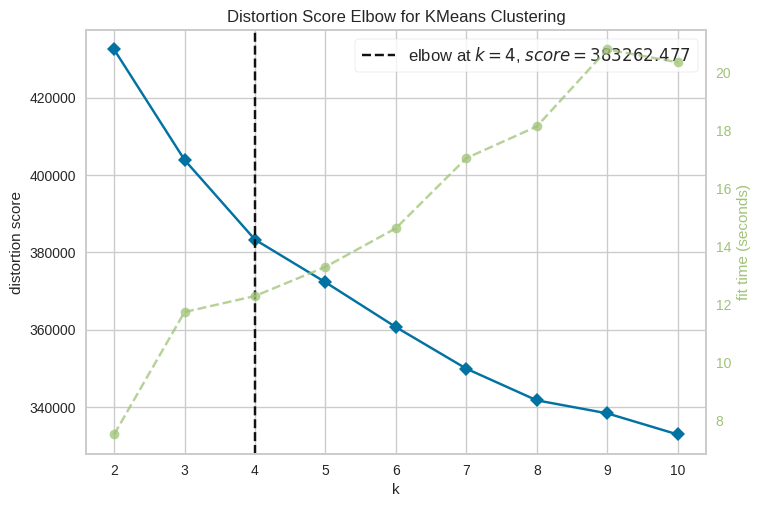

Estadísticas descriptivas para el Cluster 0:
╒═══════╤══════════╤════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════╕
│       │       ID │       Year │   age-height-weight_0 │   age-height-weight_1 │   age-height-weight_2 │   Cluster │
╞═══════╪══════════╪════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪═══════════╡
│ count │  42398   │ 42398      │           42398       │           42398       │            42398      │     42398 │
├───────┼──────────┼────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────┤
│ mean  │  70272.8 │  1995.95   │              23.2756  │             167.895   │               60.0467 │         0 │
├───────┼──────────┼────────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────┤
│ std   │  38946   │    16.2848 │               5.93553 │               9.71825 │               10.6547 │         0 │
├───────┼──

<Figure size 800x550 with 0 Axes>

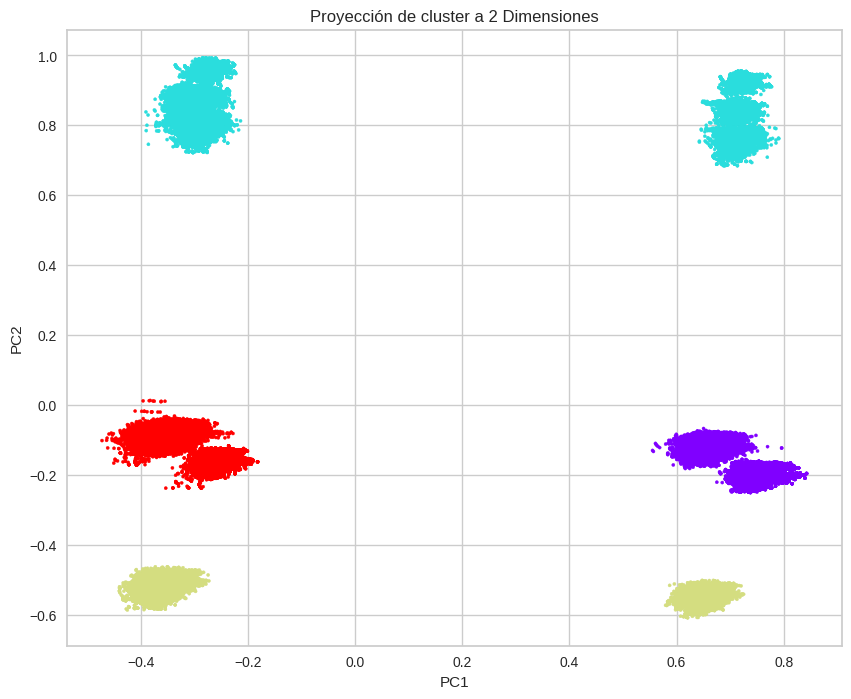

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
cluster_data = profiler.make_clusters(algorithm='KMeans', ignore_cols=['ID','Name','NOC','Games','City','Event'])

A continuación, se implemento el proceso de detección de anomalías en los datos de las Olimpiadas, tras su preprocesamiento y escalado. Para esta tarea se selecciono el algoritmo Isolation Forest debido a su sencilla implementación y eficiencia computacional. En la configuración de los hiperparámetros, se ha elegido un valor de contaminación del 0.05, lo que implica que se espera que alrededor del 5% de los datos sean identificados como anómalos.

Además, se ha aplicado un análisis de componentes principales (PCA) con el propósito de reducir la dimensionalidad de los datos a dos dimensiones, lo que simplifica la representación gráfica de las etiquetas de anomalías. En este contexto, los puntos anómalos se muestran en rojo, mientras que los datos normales se representan en azul.

Finalmente, se lleva a cabo un recuento de las anomalías y los datos normales detectados en el conjunto de datos de las Olimpiadas. Además, se presentan las estadísticas de ambos grupos. Además, es importante señalar que del análisis se excluyen características como ID, nombres y NOC, ya que proporcionan información poco útil o redundante.

Estadisticas para anomalias (First 10 Columns, 3 Decimals):
╒═══════╤═══════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤══════════╤══════════════════╤════════════════════╤═════════════════╤═════════════════╤════════════════╕
│       │      Year │   age-height-weight_0 │   age-height-weight_1 │   age-height-weight_2 │    Sex_M │   Team_Acipactli │   Team_Afghanistan │   Team_Akatonbo │   Team_Alain IV │   Team_Albania │
╞═══════╪═══════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪══════════╪══════════════════╪════════════════════╪═════════════════╪═════════════════╪════════════════╡
│ count │ 10303     │             10303     │             10303     │             10303     │ 10303    │            10303 │              10303 │           10303 │           10303 │          10303 │
├───────┼───────────┼───────────────────────┼───────────────────────┼───────────────────────┼──────────┼──────────────────┼────────────────────┼────

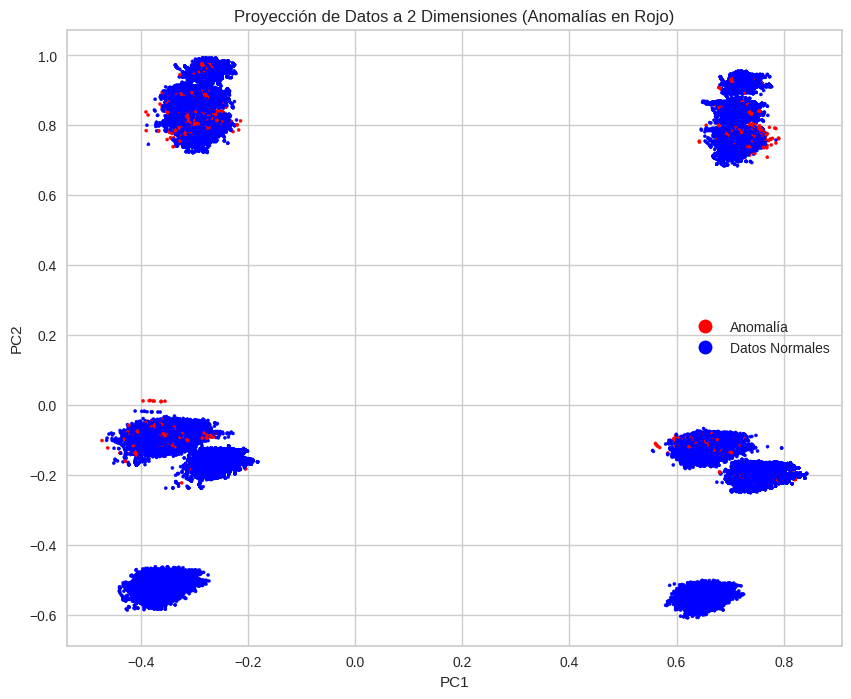

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
anomalies_data = profiler.detect_anomalies(algorithm='IsolationForest', exclude_cols=['ID','Name','NOC','Games','City','Event'], save_plots=True)

#**Análisis de Resultados**


La aplicación del método del codo a los datos de las Olimpiadas resultó en la identificación de 4 clusters. Al observar el gráfico de proyección de los clusters en dos dimensiones, se notó que los clusters no presentan superposición, pero que hay registros del mismo cluster con una gran distancia entre si. Para analizar el tamaño de estos clusters, se realizó un conteo de registros en cada uno de ellos.

El análisis reveló que el cluster 3 es el más grande, con un total de 42,398 elementos, seguido por el cluster 1, que cuenta con 39,459 elementos. Los clusters restantes tienen cantidades similares de elementos, variando de 39,459 a 32,374. Estos resultados indican una distribución desigual de los datos entre los clusters.

Además, se llevaron a cabo estudios adicionales para analizar el comportamiento de cada cluster. Se generaron tablas que proporcionan estadísticas descriptivas para cada uno de ellos, y los resultados son los siguientes:

- Cluster 0:
Con 42,398 observaciones, este grupo tiene un promedio de edad de 23.2756 años, una altura promedio de 167.895 cm y un peso promedio de 60.0467 kg. Sus desviaciones estándar son 5.93553 años para la edad, 9.71825 cm para la altura y 10.6547 kg para el peso. Las edades van desde 11 hasta 69 años, las alturas desde 127 hasta 213 cm y los pesos desde 25 hasta 167 kg.

- Cluster 1:
Con 39,459 observaciones, este grupo tiene un promedio de edad de 25.1014 años, una altura promedio de 174.627 cm y un peso promedio de 70.7554 kg. Las desviaciones estándar son 4.63587 años para la edad, 8.59731 cm para la altura y 12.2012 kg para el peso. Las edades van desde 11 hasta 55 años, las alturas desde 137 hasta 206 cm y los pesos desde 32 hasta 145 kg.

- Cluster 2:
Este cluster tiene 32,374 observaciones, con un promedio de edad de 25.3302 años, una altura promedio de 176.276 cm y un peso promedio de 69.2737 kg. Sus desviaciones estándar son 4.40714 años para la edad, 9.33455 cm para la altura y 15.4205 kg para el peso. Las edades van desde 12 hasta 52 años, las alturas desde 142 hasta 208 cm y los pesos desde 35 hasta 165 kg.

- Cluster 3:
Con 91,920 observaciones, este grupo tiene un promedio de edad de 25.7583 años, una altura promedio de 178.822 cm y un peso promedio de 76.0663 kg. Sus desviaciones estándar son 5.75267 años para la edad, 10.2584 cm para la altura y 13.3922 kg para el peso. Las edades van desde 12 hasta 71 años, las alturas desde 127 hasta 226 cm y los pesos desde 28 hasta 214 kg.

Ahora, al comparar los clusters:

Los Clusters 1 y 3 tienen promedios de edad, altura y peso más altos en comparación con los Clusters 0 y 2.
El Cluster 0 tiene las medidas más bajas en promedio para todas las variables.
Los Clusters 2 y 3 tienen desviaciones estándar de altura y peso más altas en comparación con los Clusters 0 y 1, lo que indica una mayor variabilidad en estos aspectos.
El rango de edades, alturas y pesos en cada cluster varía, con el Cluster 3 teniendo el rango más amplio en todas las variables.
El Cluster 1 muestra una mayor homogeneidad en la distribución de edad, altura y peso en comparación con los otros clusters, con desviaciones estándar más bajas.
En particular, se destada que los clusters 0 y 1 tienen las edades promedio más altas, mientras que los clusters 5 y 2 tienen las edades promedio más bajas. Los clusters 6 y 8 tienen las alturas promedio más altas, mientras que el cluster 5 tiene la altura promedio más baja. Los clusters 0 y 8 tienen los pesos promedio más altos, mientras que el cluster 2 tiene el peso promedio más bajo.

Después de aplicar el método "detect_anomalies", al observar el gráfico de proyección de los clusters en dos dimensiones, se aprecia que las anomalías se superponen con los demás datos clasificados como no anómalos. Además, Los datos anómalos, compuestos por alrededor de 10,300 observaciones, presentan valores promedio inferiores en todas las columnas comparado con los datos no anómalos. Además, exhiben una menor variabilidad al observar las desviaciones estándar, lo que sugiere una concentración más ajustada de valores alrededor de la media. Los datos anómalos tienden a tener un rango más estrecho, como se evidencia en sus valores mínimos y máximos. En contraste, los datos no anómalos, con 196,000 observaciones, muestran una mayor dispersión y amplitud, medias ligeramente más altas y desviaciones estándar mayores. Estas diferencias en las estadísticas reflejan la naturaleza heterogenea de los dos conjuntos de datos

#**Conclusión**

Dentro del marco del Análisis Exploratorio de Datos (EDA), el método clean_data demostró ser efectivo al eliminar las filas con valores nulos y duplicados, lo que resultó en un conjunto de datos más coherente y manejable. Sin embargo, esta acción tuvo repercusiones en forma de pérdida de información, especialmente en relación con la variable "MEDAL," que se eliminó debido a la alta cantidad de valores nulos. Asimismo, se realizó una subdivisión de la variable "age-height-weight" en tres columnas separadas, permitiendo un análisis más detallado de la edad, altura y peso de los atletas.

Cabe mencionar que el método clean_data no implicó la eliminación de outliers. Esta decisión suele depender de los objetivos del análisis y del contexto de los datos. En ocasiones, los outliers se eliminan para mejorar la calidad de los datos, mientras que en otros casos se pueden retener o tratar de manera diferente para evitar la pérdida de información importante.

En relación a la formación de los clusters, es importante destacar que estos presentan una cierta separacion entre los registros de un mismo cluster, posiblemente debido a las características intrínsecas de los datos. Esta particularidad sugiere que sería beneficioso explorar métodos de clusterización alternativos, como DBSCAN o k-modes, ya que a diferencia de K-means, DBSCAN es más flexible a la hora de identificar formas irregulares en los clusters y k-modes trabaja bien con variables categoricas.

Además, es notable que los clusters no están distribuidos de manera uniforme en términos de cantidad de elementos, lo que indica que ciertos grupos de individuos están sobrerrepresentados en comparación con otros.Esta asimetría podría deberse a diversas razones, como la naturaleza inherente de los datos o la metodología de agrupación elegida.

Al analizar las características distintivas de cada cluster, se hace evidente que estos representan grupos de personas con perfiles muy diversos. Por ejemplo, los clusters 0 y 3 tienen edades promedio más altas, mientras que los clusters 1 y 2 tienen las edades promedio más bajas. Sin embargo, sería beneficioso estudiar y comparar a través de más características. No obstante, debido al tamaño del dataframe resultante, esto se vuelve muy complejo.


En relación a los resultados de la detección de anomalías en los datos de las Olimpiadas, se aprecia la existencia de eventos poco comunes o atípicos dentro del conjunto de datos. No obstante, debido a la superposición con los datos normales y las diferencias en tamaño y características, existe margen para mejorar la detección de anomalías en este contexto. Se requieren enfoques más avanzados y una comprensión más profunda de los datos para abordar eficazmente la detección de anomalías en el contexto de las Olimpiadas.

Por último, teniendo en cuenta que Bombin ha recibido la ayuda de expertos en análisis de datos, sería oportuno considerar la colaboración con expertos en el ámbito deportivo para implementar medidas específicas para cada cluster. Por ejemplo, se observa cierta correlacion entre las características. Por ejemplo, los clusters 2 y 3, que tienen los pesos promedio más altos, también tienen años promedio cercanos y edades promedio similares. Esto podría indicar que estos clusters pueden representar atletas de ciertas disciplinas que tienden a ser más pesados y de edades similares, posiblemente relacionados con deportes como el lanzamiento de peso. Esto permitiría la asignación de becas o la provisión de material especializado a los miembros de estos clusters, contribuyendo así a un enfoque más personalizado en el apoyo a los deportistas. En conclusión, estos clusters podrían utilizarse para segmentar y analizar de manera más detallada la población de atletas olímpicos según sus características. Además de comprender las tendencias y diferencias en diversos deportes, así como para la planificación de programas de entrenamiento o la identificación de futuros talentos.

El análisis de clusters tiene diversas implicaciones prácticas que van más allá de la gestión de atletas. Por ejemplo, puede influir en la planificación de eventos deportivos, ya que al conocer la distribución de edades y las características físicas de los atletas, se pueden tomar decisiones más informadas sobre la elección de sedes, la selección de instalaciones y la logística general de los eventos.

Además, este enfoque analítico brinda oportunidades para la colaboración entre organizaciones deportivas y empresas patrocinadoras. Al comprender a fondo los perfiles de los clusters, estas entidades pueden dirigir sus estrategias de marketing y patrocinio de manera más efectiva. Esto les permite asociarse con atletas cuyas características se alineen de manera óptima con sus valores y objetivos.





#**Acotaciones y otros conjuntos de datos**

La ejecución de la clase con el conjunto de datos de las Olimpiadas requirió el uso de "Colab Pro" debido al alto consumo de memoria RAM. Además, se procede a probar la clase en un nuevo conjunto de datos, en particular, la unión entre "stats_players.csv" y "salarios.csv" correspondientes al laboratorio 8. Estos conjuntos de datos contienen información sobre las características y habilidades de diversos jugadores de fútbol.

In [ ]:
df_players = pd.read_csv('/content/drive/MyDrive/lab8/stats_players.csv')
df_salarios = pd.read_csv('/content/drive/MyDrive/lab8/salarios.csv')
df_players_salarios = df_salarios.merge(df_players, left_on='Player', right_on='Name')
df_players_salarios.shape
sampled_data1 = df_players_salarios.sample(frac=0.5, random_state=42)
sampled_data1.shape

(933, 42)

Iniciando el perfilado de los datos.
Caracterizando variables...
¡Alerta! Se encontraron 55 outliers en la columna 'Weekly Salary'
¡Alerta! Se encontraron 5 outliers en la columna 'Height'
¡Alerta! Se encontraron 4 outliers en la columna 'Weight'
¡Alerta! Se encontraron 4 outliers en la columna 'Age'
¡Alerta! Se encontraron 367 outliers en la columna 'Weak_foot'
¡Alerta! Se encontraron 11 outliers en la columna 'Skill_Moves'
¡Alerta! Se encontraron 107 outliers en la columna 'Ball_Control'
¡Alerta! Se encontraron 107 outliers en la columna 'Dribbling'
¡Alerta! Se encontraron 3 outliers en la columna 'Aggression'
¡Alerta! Se encontraron 8 outliers en la columna 'Reactions'
¡Alerta! Se encontraron 6 outliers en la columna 'Vision'
¡Alerta! Se encontraron 19 outliers en la columna 'Composure'
¡Alerta! Se encontraron 103 outliers en la columna 'Short_Pass'
¡Alerta! Se encontraron 10 outliers en la columna 'Long_Pass'
¡Alerta! Se encontraron 17 outliers en la columna 'Acceleration'
¡Alerta!

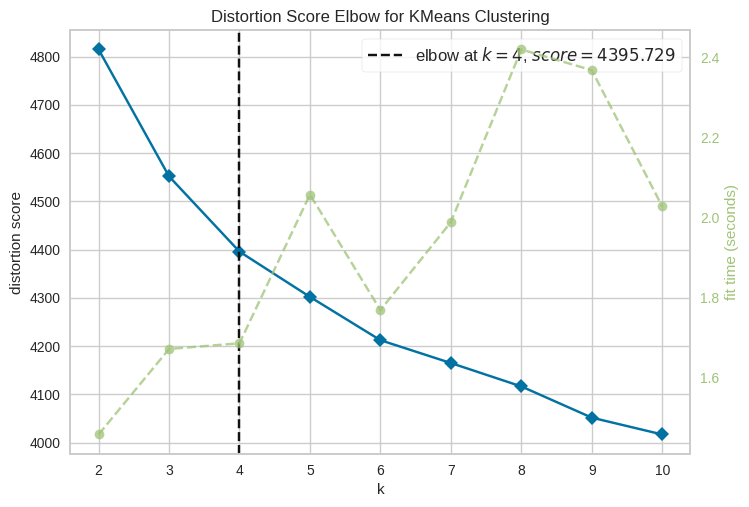

Estadísticas descriptivas para el Cluster 0:
╒═══════╤══════════════╤═════════════════╤═══════════╤═══════════╤═══════════╤═════════════╤═══════════════╤════════════════╤═════════════╤═══════════╤══════════════════╤═══════════════════╤══════════════╤═════════════╤═════════════════╤══════════╤═════════════╤════════════╤══════════════╤═════════════╤════════════════╤═══════════╤═══════════╤════════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════════╤═════════════╤══════════════╤═══════════╤═════════════════════╤═════════════╤═══════════╤═══════════╕
│       │   Unnamed: 0 │   Weekly Salary │    Height │    Weight │       Age │   Weak_foot │   Skill_Moves │   Ball_Control │   Dribbling │   Marking │   Sliding_Tackle │   Standing_Tackle │   Aggression │   Reactions │   Interceptions │   Vision │   Composure │   Crossing │   Short_Pass │   Long_Pass │   Acceleration │     Speed │   Stamina │   Strength │   Balance │   Agility │   Jumping │   Heading │   Shot_Power │   Finishin

<Figure size 800x550 with 0 Axes>

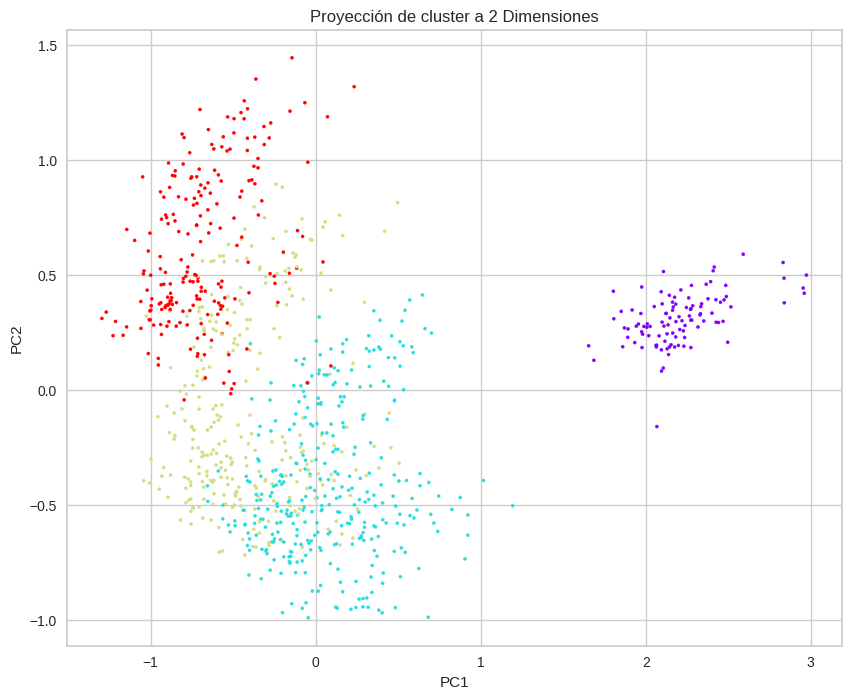

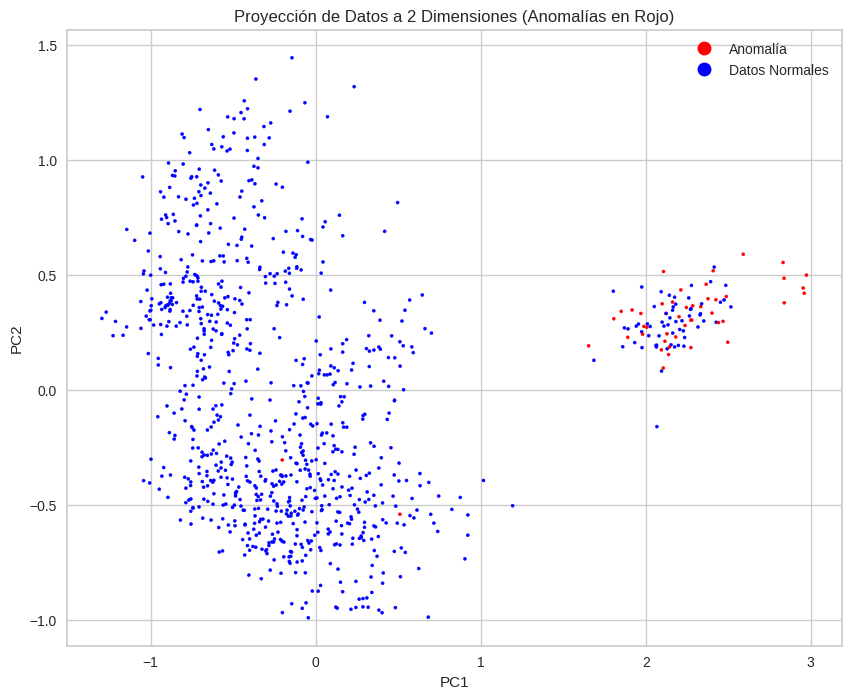

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
sampled_data1 = df_players_salarios.sample(frac=0.5, random_state=42)
instancia = Profiler(sampled_data1)
instancia.profile()

Al realizar una observacion superficial de los resultados, se notan outliers en 23 variables, y posterior a la limpieza hay un total de 933 registros, lo que indica que no se eliminaron registros, las estadísticas presentadas en los datos limpios se refieren a un conjunto de jugadores de fútbol y abarcan diversos atributos, incluyendo salario semanal, altura, peso, edad y numerosos indicadores de habilidades como el control del balón, dribbling, marcaje, agresividad, velocidad, resistencia, entre otros. Los jugadores tienen un salario promedio de alrededor de 49,856.7 unidades y una edad media de aproximadamente 25.03 años. Las estadísticas varían en un amplio rango, lo que refleja la diversidad de habilidades y características de los jugadores, desde habilidades técnicas como el dribbling hasta atributos físicos como la fuerza y la velocidad.

 Luego se procede a la aplicación de un escalado logarítmico a las columnas numéricas utilizando StandardScaler, seguido por un escalado adicional mediante MinMaxScaler. Asimismo, se aplicó la codificación One-Hot a las columnas categóricas. El tamaño del dataframe resultante después de realizar el escalado muestra 933 filas y 1,972 columnas. El número de filas se mantiene igual que el de los datos limpios ingresados, pero el aumento significativo en el número de columnas se debe a la aplicación de la codificación One-Hot en las columnas categóricas. En este proceso, se crea una nueva columna binaria para cada categoría que indica la presencia o ausencia de dicha categoría. Las estadísticas posteriores al escalado muestran que todas las variables tienen igual escala. Antes del escalado, las variables presentan diferentes escalas y unidades, lo que dificulta su comparación directa.

La aplicación del método del codo a los datos de las Olimpiadas resultó en la identificación de 4 clusters. Al observar el gráfico de proyección de los clusters en dos dimensiones, se notó que 3 clusters presentan cierto grado de superposición, mientras que 1 se encuentra claramente separado del resto de los datos. Esto debe ocurrir posiblemente debido a las características intrínsecas de los datos. Esta particularidad sugiere que sería beneficioso explorar métodos de clusterización alternativos, como DBSCAN, ya que a diferencia de K-means, DBSCAN es más flexible a la hora de identificar formas irregulares en los clusters.

Para analizar el tamaño de estos clusters, se realizó un conteo de registros en cada uno de ellos. El análisis reveló que el cluster 1 es el más grande, con un total de 336 elementos, seguido por el cluster 2 con 281, el cluster 3 con 211. El cluster 9 es el más pequeño, con tan solo 105 elementos. Estos resultados indican una distribución desigual de los datos entre los clusters.

Los clusters presentan perfiles únicos en cuanto a salarios, edad, habilidades técnicas y características físicas. El Cluster 0 destaca por salarios más bajos, jugadores mayores y habilidades técnicas intermedias, mientras que el Cluster 1 exhibe salarios más altos, jugadores más jóvenes y habilidades técnicas más desarrolladas. El Cluster 2 se sitúa en un punto intermedio con habilidades técnicas moderadas y salarios promedio, mientras que el Cluster 3 se distingue por salarios elevados, jugadores más jóvenes y habilidades técnicas avanzadas, sugiriendo un grupo de futbolistas con perfiles más técnicos y mejor remunerados en comparación con los demás clusters.

Después se aplica el método "detect_anomalies", al observar el gráfico de proyección de los clusters en dos dimensiones, se aprecia que las anomalías se superponen con los demás datos clasificados como no anómalos. Además, al realizar un recuento, se verifica que el total de anomalías asciende a 47, mientras que los datos normales alcanzan la cifra de 886. Finalmente, se presentan las estadísticas de las anomalías y los datos normales detectados en el conjunto de datos de los jugadores.

Las estadísticas de los conjuntos de datos "Anomalies" y "Normal Data" muestran notables diferencias en varias estadísticas clave. En cuanto a las características de los jugadores, el grupo no anomalo exhibe una media de salario semanal más alta, lo que sugiere que podría representar a jugadores con contratos más lucrativos. Además, la media de edad en el no anomalo es más baja, indicando una posible presencia de jugadores más jóvenes. En términos de habilidades futbolísticas, el  no anomalo muestra medias más altas en atributos como "Weak_foot", "Skill_Moves", "Ball_Control", "Dribbling" y "Marking", lo que podría sugerir una mayor calidad técnica y versatilidad en los jugadores en este grupo.

En relación a los resultados de la detección de anomalías en los datos de los jugadores, se aprecia la existencia de eventos poco comunes o atípicos dentro del conjunto de datos. No obstante, debido a la superposición con los datos normales y las diferencias en tamaño y características, existe margen para mejorar la detección de anomalías en este contexto. Se requieren enfoques más avanzados y una comprensión más profunda de los datos para abordar eficazmente la detección de anomalías en el contexto de los jugadores.





Iniciando el perfilado de los datos.
Caracterizando variables...
¡Alerta! Se encontraron 4 outliers en la columna 'SepalWidthCm'
Graficando variables...


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Limpiando datos...
Escalando características...
Estadísticas antes del escalado:
╒═══════╤══════════╤═════════════════╤════════════════╤═════════════════╤════════════════╕
│       │       Id │   SepalLengthCm │   SepalWidthCm │   PetalLengthCm │   PetalWidthCm │
╞═══════╪══════════╪═════════════════╪════════════════╪═════════════════╪════════════════╡
│ count │ 150      │      150        │     150        │       150       │     150        │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┤
│ mean  │  75.5    │        5.84333  │       3.054    │         3.75867 │       1.19867  │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┤
│ std   │  43.4454 │        0.828066 │       0.433594 │         1.76442 │       0.763161 │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┤
│ min   │   1      │        4.3      │       2        │         1       │       0.1      │
├───────┼

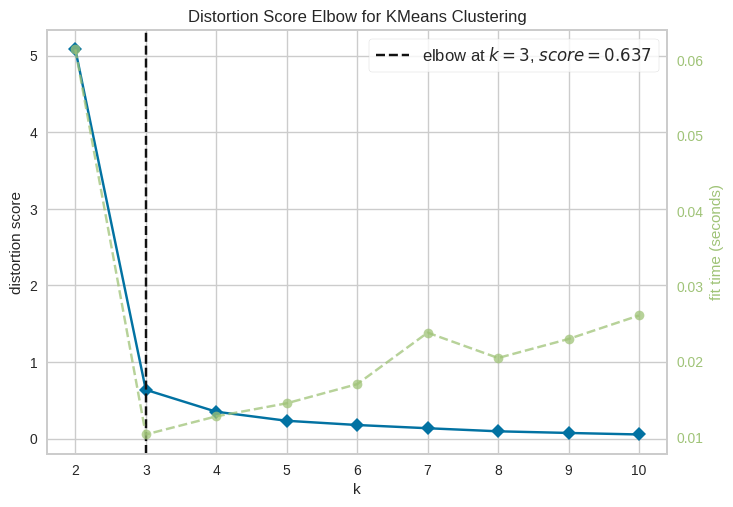

Estadísticas descriptivas para el Cluster 0:
╒═══════╤══════════╤═════════════════╤════════════════╤═════════════════╤════════════════╤═══════════╕
│       │       Id │   SepalLengthCm │   SepalWidthCm │   PetalLengthCm │   PetalWidthCm │   Cluster │
╞═══════╪══════════╪═════════════════╪════════════════╪═════════════════╪════════════════╪═══════════╡
│ count │  50      │        50       │      50        │       50        │       50       │        50 │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┼───────────┤
│ mean  │ 125.5    │         6.588   │       2.974    │        5.552    │        2.026   │         0 │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┼───────────┤
│ std   │  14.5774 │         0.63588 │       0.322497 │        0.551895 │        0.27465 │         0 │
├───────┼──────────┼─────────────────┼────────────────┼─────────────────┼────────────────┼───────────┤
│ min   │ 101      │        

<Figure size 800x550 with 0 Axes>

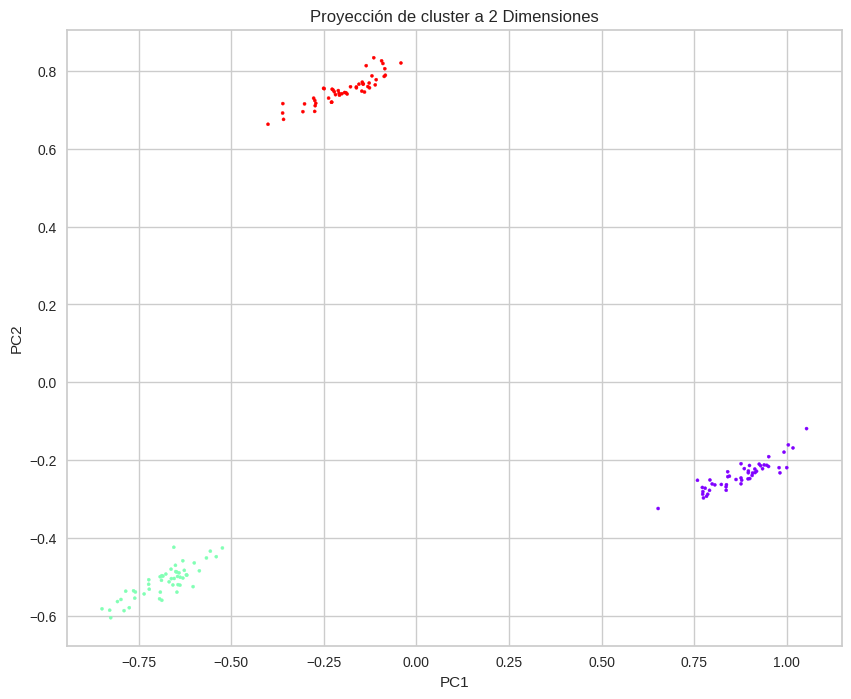

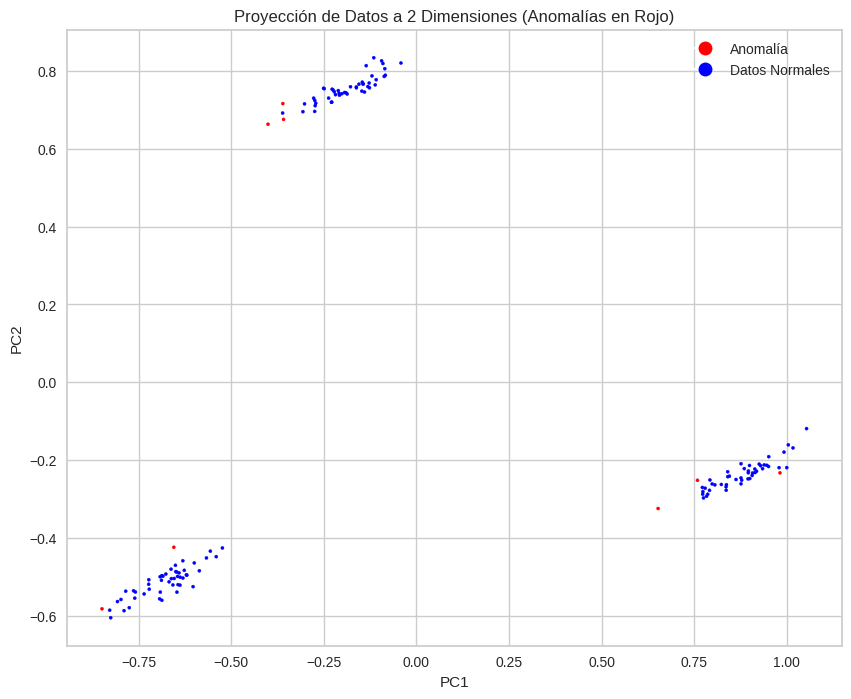

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
df_flores = pd.read_csv('/content/drive/MyDrive/proyecto1lab/Iris.csv')
sampled_data2 = df_flores.sample(frac=1, random_state=42)
instancia = Profiler(sampled_data2)
instancia.profile()

Finalmente, se procedió a evaluar la clase en un dataframe que contenía únicamente datos numéricos, obtenidos de https://www.kaggle.com/datasets/uciml/iris/data. En este análisis, se observó una mejora significativa en la asignación de clusters, destacando la eficacia del método en relación con la naturaleza de los datos. Los clusters resultantes son simétricos y claramente diferenciados. El Cluster 0 se distingue por presentar flores de mayor tamaño y homogeneidad, el Cluster 1 exhibe dimensiones más reducidas y uniformes, mientras que el Cluster 2 muestra características morfológicas intermedias con cierta diversidad.

Finalmente, en cada sección se identificaron un par de datos anómalos, siendo 8 datos anomalos versus 142 normales. Las estadísticas descriptivas revelan marcadas diferencias entre el conjunto de datos anómalos y no anómalos. En el grupo anómalo, las dimensiones de las flores iris tienden a ser más bajas en promedio y muestran una mayor variabilidad en comparación con el grupo no anómalo. Por el contrario, el conjunto de datos no anómalo presenta dimensiones más homogéneas y valores promedio más altos.

\